### Naive Bayes Classification using Scikit-learn

https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

In [2]:
# read dataset

import openpyxl
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

df = pd.read_excel("Soccer_Analytics_data-Binary.xlsx", engine = 'openpyxl', usecols = [0,1,2,3])
X = df['xGdif']
y= df['Result']
X = np.array(X).reshape((-1, 1))

#X=X.shape(1,-1)
#y=y.shape(1,-1)
# print(df['xGdif'].unique())

In [3]:
# Use describe()
df.describe()

,xGH,xGA,Result,xGdif,xGdif_Dif
count,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.478684,1.182105,0.476316,0.947368,0.296579
std,0.818644,0.668394,0.500097,0.760064,1.220543
min,0.000000,0.000000,0.000000,0.000000,-2.700000
25%,0.900000,0.600000,0.000000,0.000000,-0.500000
50%,1.400000,1.100000,0.000000,1.000000,0.200000
75%,1.900000,1.600000,1.000000,2.000000,1.125000
max,5.100000,3.600000,1.000000,2.000000,4.200000


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#y_train.head()

#  GNB

In [5]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(f'Accuracy of GNB classifier on training set: {gnb.score(X_train, y_train):.2f}')
print(f'Accuracy of GNB classifier on test set: {gnb.score(X_test, y_test):.2f}')

Accuracy of GNB classifier on training set: 0.59
Accuracy of GNB classifier on test set: 0.55


In [6]:
# Prediction with gnb algorithm - Use of 'predict' method

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

#y_pred_test

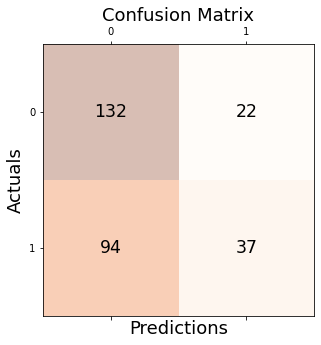

In [7]:
conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [8]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
(tn, fp, fn, tp)

(132, 22, 94, 37)

In [9]:
from sklearn.metrics import classification_report
#target_names = ['1','2','0']
print(classification_report(y_train, y_pred_train, labels=np.unique(y_pred_train)))

              precision    recall  f1-score   support

           0       0.58      0.86      0.69       154
           1       0.63      0.28      0.39       131

    accuracy                           0.59       285
   macro avg       0.61      0.57      0.54       285
weighted avg       0.60      0.59      0.55       285



# kNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(f'Accuracy of K-NN classifier on training set: {knn.score(X_train, y_train):.2f}')
print(f'Accuracy of K-NN classifier on test set: {knn.score(X_test, y_test):.2f}')

Accuracy of K-NN classifier on training set: 0.72
Accuracy of K-NN classifier on test set: 0.56


In [11]:
# Prediction with knn algorithm - Use of 'predict' method

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

#y_pred_test

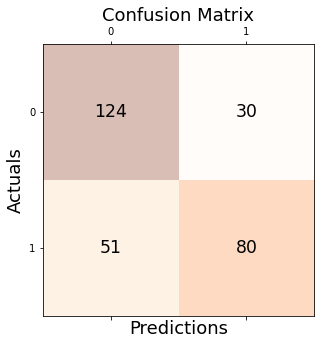

In [12]:
conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [13]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
(tn, fp, fn, tp)

(124, 30, 51, 80)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train, labels=np.unique(y_pred_train)))

              precision    recall  f1-score   support

           0       0.71      0.81      0.75       154
           1       0.73      0.61      0.66       131

    accuracy                           0.72       285
   macro avg       0.72      0.71      0.71       285
weighted avg       0.72      0.72      0.71       285



# SVM

In [15]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

print(f'Accuracy of SVM classifier on training set: {clf.score(X_train, y_train):.2f}')
print(f'Accuracy of SVM classifier on test set: {clf.score(X_test, y_test):.2f}')

Accuracy of SVM classifier on training set: 0.60
Accuracy of SVM classifier on test set: 0.52


In [16]:
#Predict the response for test dataset
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

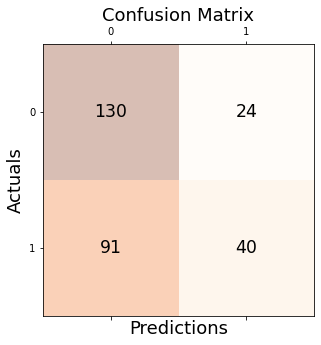

In [17]:
conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [18]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
(tn, fp, fn, tp)

(130, 24, 91, 40)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train, labels=np.unique(y_pred_train)))

              precision    recall  f1-score   support

           0       0.59      0.84      0.69       154
           1       0.62      0.31      0.41       131

    accuracy                           0.60       285
   macro avg       0.61      0.57      0.55       285
weighted avg       0.61      0.60      0.56       285

